
image segmentation method

for image segmentation:


syn_met passed


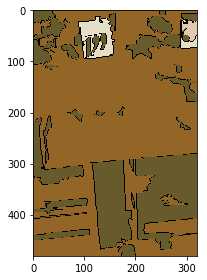

syn_met passed


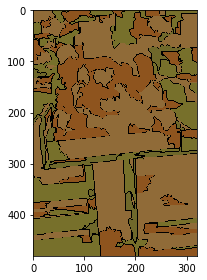

syn_met passed


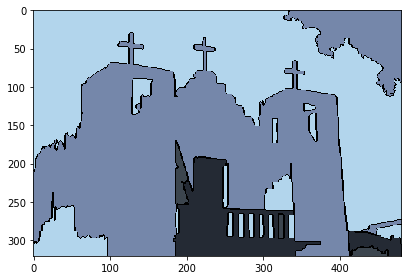

syn_met passed


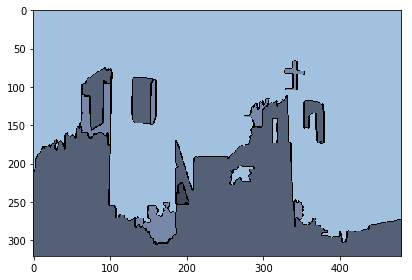

syn_met passed


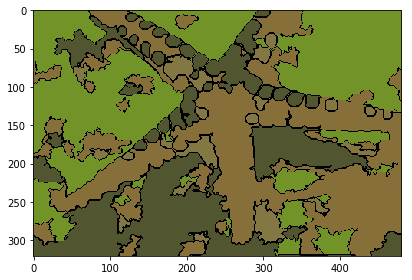

In [ ]:
# image eigenvector
import scipy
import skimage
from skimage.segmentation import felzenszwalb, mark_boundaries, slic
from os.path import basename, join, isfile
import os
import matplotlib.pyplot as plt    
from image_segmentation import large_image_seg
from imageio import imread

%matplotlib inline

basename = os.getcwd()
img_dir = join(basename, 'input')
img_list = [join(img_dir, f) for f in os.listdir(img_dir) if isfile(join(img_dir, f))]

# vis part
for img_path in img_list:
    
    if img_path[-3:] == 'jpg':
        img = imread(img_path)

        # 1. 之前方法
#         p_label = large_image_seg(img_path=img_path, sp_num=1000, sp_mode="similarity", sp_connectivity=3, \
#                                  graph_met='lib_met', admm_met='admm', num_cuts=5)  
# #         p_label2 = large_image_seg(img_path=img_path, sp_num=1000, sp_mode="distance", sp_connectivity=3, \
# #                                  graph_met='syn_met', admm_met='density_admm', num_cuts=2)

#         # show boundary
#         plt.figure()
#         plt.imshow(mark_boundaries(img, p_label))
#         plt.show()
                
#         from skimage import data, io, segmentation, color
#         out = color.label2rgb(p_label, img, kind='avg')
#         out = segmentation.mark_boundaries(out, p_label, (0, 0, 0))
#         io.imshow(out)
#         io.show()
        
    
        # 1. original method
        p_label = large_image_seg(img_path=img_path, sp_num=400, sp_mode="similarity", sp_connectivity=3, \
                                 graph_met='syn_met', admm_met='admm', num_cuts=3, merge=False)  

        # show boundary
#             plt.figure()
#             plt.imshow(mark_boundaries(img, p_label))
#             plt.show()
        from skimage import data, io, segmentation, color
        out = color.label2rgb(p_label, img, kind='avg')
        out = segmentation.mark_boundaries(out, p_label, (0, 0, 0))
        io.imshow(out)
        io.show()
        
        # 2. add the distance measurement, 优化测度
        p_label = large_image_seg(img_path=img_path, sp_num=400, sp_mode="similarity", sp_connectivity=3, \
                                 graph_met='syn_met', admm_met='admm', num_cuts=3, merge=False, \
                                 dist_hist=True)  

        # show boundary
#             plt.figure()
#             plt.imshow(mark_boundaries(img, p_label))
#             plt.show()
        from skimage import data, io, segmentation, color
        out = color.label2rgb(p_label, img, kind='avg')
        out = segmentation.mark_boundaries(out, p_label, (0, 0, 0))
        io.imshow(out)
        io.show()
        
        
        # 3. add merge method, 优化稀疏系数
#         for merge in [2,3,4]:
#             p_label = large_image_seg(img_path=img_path, sp_num=1000, sp_mode="similarity", sp_connectivity=3, \
#                                      graph_met='syn_met', admm_met='admm', num_cuts=5, merge=merge)  

#             # show boundary
#     #             plt.figure()
#     #             plt.imshow(mark_boundaries(img, p_label))
#     #             plt.show()
#             from skimage import data, io, segmentation, color
#             out = color.label2rgb(p_label, img, kind='avg')
#             out = segmentation.mark_boundaries(out, p_label, (0, 0, 0))
#             io.imshow(out)
#             io.show()

        
#         # 2. 校正
#         var_p_label = large_image_seg(img_path=img_path, sp_num=1000, sp_mode="distance", sp_connectivity=3, \
#                                  graph_met='syn_met', admm_met='var_admm', num_cuts=10)
#         plt.figure()
#         plt.imshow(mark_boundaries(img, var_p_label))
#         plt.show()
#         out = color.label2rgb(var_p_label, img, kind='avg')
#         out = segmentation.mark_boundaries(out, var_p_label, (0, 0, 0))
#         io.imshow(out)
#         io.show()
    
        # evalaute
        
# EM: admm + variation


In [ ]:
import numpy as np
%matplotlib inline
from imageio import imread


def hist(img_path):
    # reads an input image, color mode
    img = imread(img_path) 
    print(img[:,:,0].shape)
    
    color_hist = []
    # find frequency of pixels in range 0-255, calculate histogram of blue, green or red channel respectively.
    for i in range(3):
        histr, bins = np.histogram(img[:,:,i].ravel(), bins=np.arange(257))

        histr = np.reshape(histr, (16, 16)) # 16 bins
        histr = np.sum(histr, axis=1)  
        
        color_hist.append(histr)
        
    hist = normalize(color_hist).flatten()
    hist = np.asarray(hist)
    return hist

hist1 = hist('24063.jpg')
hist2 = hist('12003.jpg')
print(hist1.shape, hist2.shape)
from scipy.spatial import distance
diff = distance.cityblock(hist1, hist2)
print(diff)

In [ ]:
# importing required libraries of opencv 
import cv2 
import numpy as np

%matplotlib inline
# importing library for plotting 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import normalize
  

# # reads an input image 
# from imageio import imread
# img = imread('24063.jpg') 
# img = img[:3,:2]
# print(img)
# print(img.dtype)

# # img = cv2.imread('24063.jpg',1) 
# # img = np.asarray(img)
# print(img.shape)

# img = np.float32(img)



def hist(img_path):
    # reads an input image, color mode
    img = cv2.imread(img_path, 1) 
    
    color_hist = []
    # find frequency of pixels in range 0-255, calculate histogram of blue, green or red channel respectively.
    for i in range(3):
        histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
        histr = np.reshape(histr, (16, 16)) # 16 bins
        histr = np.sum(histr, axis=1)  
        
        color_hist.append(histr)
        
    hist = normalize(color_hist).flatten()
    hist = np.asarray(hist)
    return hist

hist1 = hist('24063.jpg')
hist2 = hist('12003.jpg')
print(hist1.shape, hist2.shape)
from scipy.spatial import distance
diff = distance.cityblock(hist1, hist2)
print(diff)

In [ ]:
import numpy as np
a=np.ones((10,10))

print(a)

# pos=[[1,2],[2,3],[4,5]]
# pos = np.asarray(pos)

np.take(a,[[1,2],[3,4]])

In [ ]:
import numpy as np
a=[1,2,3,4]
a=np.reshape(a, (2,2))
np.sum(a, axis=1)  


In [ ]:
import numpy as np
numpy.take([[1, 2], [3, 4]], [0, 3])
a=np.ones((10,10,3))
a[:,:,1].shape